In [98]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats

import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
import numpy as np
import statsmodels.formula.api as smf

In [75]:
tips = sns.load_dataset("tips")

tips["net_bill"] = tips["total_bill"] - tips["tip"]

In [6]:
formula = "tip ~ sex + smoker + time + net_bill"

y, X = patsy.dmatrices(formula, data=tips, return_type="dataframe")

print(X.head())
print(y.head())

   Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
0        1.0            1.0           1.0             1.0     15.98
1        1.0            0.0           1.0             1.0      8.68
2        1.0            0.0           1.0             1.0     17.51
3        1.0            0.0           1.0             1.0     20.37
4        1.0            1.0           1.0             1.0     20.98
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61


In [7]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.64e-20
Time:                        15:55:53   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [8]:
formula_updated = "tip ~ net_bill" 

y, X = patsy.dmatrices(formula_updated, data=tips, return_type="dataframe")

model_updated = sm.OLS(y, X).fit()

print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           5.02e-23
Time:                        15:56:17   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

In [9]:
residuos = model_updated.resid

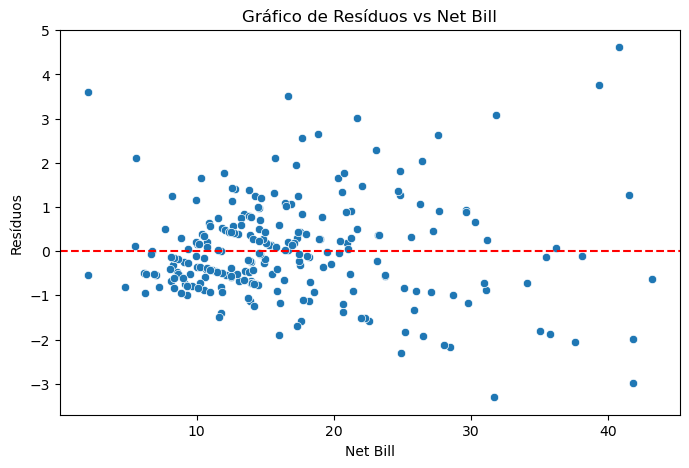

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tips["net_bill"], y=residuos)

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Net Bill")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs Net Bill")

plt.show()

In [11]:
y, X1 = patsy.dmatrices("tip ~ net_bill", tips, return_type="dataframe")
y, X2 = patsy.dmatrices("tip ~ np.log(net_bill)", tips, return_type="dataframe")
y, X3 = patsy.dmatrices("tip ~ net_bill + I(net_bill**2)", tips, return_type="dataframe")

model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()

In [12]:
# Criar tabela de comparação
comparison = {
    "Modelo": ["Linear", "Logarítmico", "Polinomial"],
    "R² Ajustado": [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj],
    "AIC": [model1.aic, model2.aic, model3.aic]
}
comparison_df = pd.DataFrame(comparison)
print(comparison_df)

        Modelo  R² Ajustado         AIC
0       Linear     0.329783  755.257986
1  Logarítmico     0.291526  768.802834
2   Polinomial     0.328898  756.569434


In [14]:
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + size + net_bill", data=tips, return_type="dataframe")
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     31.95
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.49e-21
Time:                        16:40:10   Log-Likelihood:                -90.998
No. Observations:                 244   AIC:                             192.0
Df Residuals:                     239   BIC:                             209.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3372      0.076      4.457

In [17]:
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + size + net_bill", data=tips, return_type="dataframe")

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

y, X = patsy.dmatrices("np.log(tip) ~ size + net_bill", data=tips, return_type="dataframe")

modelo_final = sm.OLS(y, X).fit()

print(modelo_final.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     31.95
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           2.49e-21
Time:                        16:47:30   Log-Likelihood:                -90.998
No. Observations:                 244   AIC:                             192.0
Df Residuals:                     239   BIC:                             209.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3372      0.076      4.457

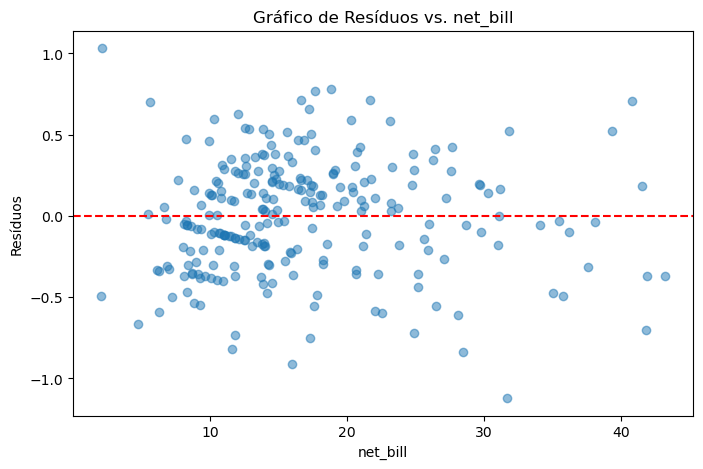

In [18]:
residuos = modelo_final.resid

plt.figure(figsize=(8,5))
plt.scatter(tips["net_bill"], residuos, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--") 
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos vs. net_bill")
plt.show()

In [20]:
y_log, X_log = patsy.dmatrices("np.log(tip) ~ sex + smoker + np.log(net_bill)", data=tips, return_type="dataframe")
modelo_log = sm.OLS(y_log, X_log).fit()

tips["net_bill_sq"] = tips["net_bill"] ** 2
y_poly, X_poly = patsy.dmatrices("np.log(tip) ~ sex + smoker + net_bill + net_bill_sq", data=tips, return_type="dataframe")
modelo_poly = sm.OLS(y_poly, X_poly).fit()

print("Modelo com log(net_bill):")
print(modelo_log.summary())

print("\nModelo com polinômio:")
print(modelo_poly.summary())

Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     37.56
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           6.14e-20
Time:                        16:58:51   Log-Likelihood:                -96.300
No. Observations:                 244   AIC:                             200.6
Df Residuals:                     240   BIC:                             214.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept     

In [23]:
y_pred_original = np.exp(modelo_log.predict(X_log))  

r2_original = r2_score(tips["tip"], y_pred_original)

y1, X1 = patsy.dmatrices("tip ~ sex + smoker + net_bill", data=tips, return_type="dataframe")
modelo1 = sm.OLS(y1, X1).fit()
r2_modelo1 = modelo1.rsquared

print(f"R² do modelo final (na escala original): {r2_original:.4f}")
print(f"R² do modelo do item 1: {r2_modelo1:.4f}")

R² do modelo final (na escala original): 0.3049
R² do modelo do item 1: 0.3349


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

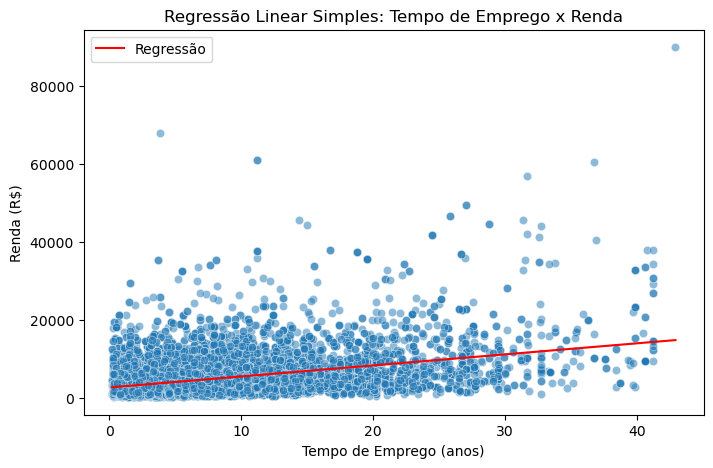

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  renda  

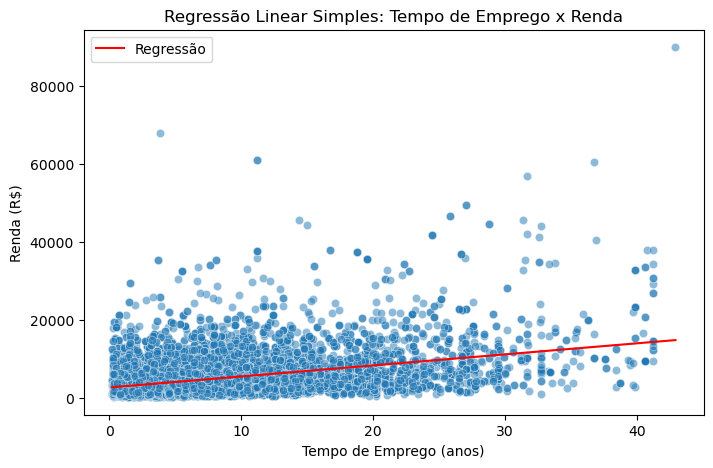

In [89]:
df = pd.read_csv("previsao_de_renda.csv")
print(df.info()) 
print(df.describe())  

df = df.dropna(subset=['tempo_emprego', 'renda'])  

X = df[['tempo_emprego']] 
y = df['renda']  

X = sm.add_constant(X) 
modelo = sm.OLS(y, X).fit()  


print(modelo.summary())

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tempo_emprego'], y=df['renda'], alpha=0.5)
sns.lineplot(x=df['tempo_emprego'], y=modelo.predict(X), color="red", label="Regressão")
plt.xlabel("Tempo de Emprego (anos)")
plt.ylabel("Renda (R$)")
plt.title("Regressão Linear Simples: Tempo de Emprego x Renda")
plt.legend()
plt.show()
print(df.info()) 
print(df.describe()) 

df = df.dropna(subset=['tempo_emprego', 'renda']) 

X = df[['tempo_emprego']]  
y = df['renda']  

X = sm.add_constant(X)  
modelo = sm.OLS(y, X).fit() 


print(modelo.summary())

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['tempo_emprego'], y=df['renda'], alpha=0.5)
sns.lineplot(x=df['tempo_emprego'], y=modelo.predict(X), color="red", label="Regressão")
plt.xlabel("Tempo de Emprego (anos)")
plt.ylabel("Renda (R$)")
plt.title("Regressão Linear Simples: Tempo de Emprego x Renda")
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     580.0
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:08:58   Log-Likelihood:            -1.2248e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12461   BIC:                         2.450e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1482.03

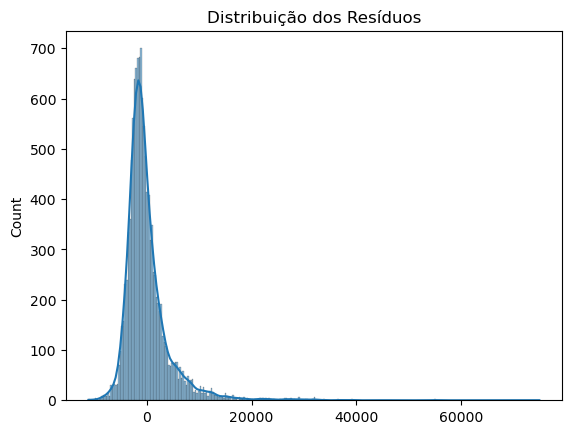

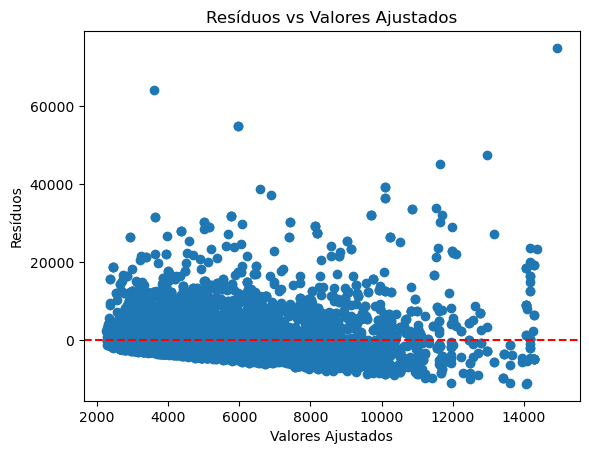

In [90]:
df = pd.read_csv("previsao_de_renda.csv") 

df = df.dropna()

variaveis_explicativas = ["tempo_emprego", "idade", "qtd_filhos", "qt_pessoas_residencia"]
X = df[variaveis_explicativas]
y = df["renda"]

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

residuos = modelo.resid

sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

plt.scatter(modelo.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     711.9
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:21:28   Log-Likelihood:                -13943.
No. Observations:               12466   AIC:                         2.789e+04
Df Residuals:                   12462   BIC:                         2.792e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.60

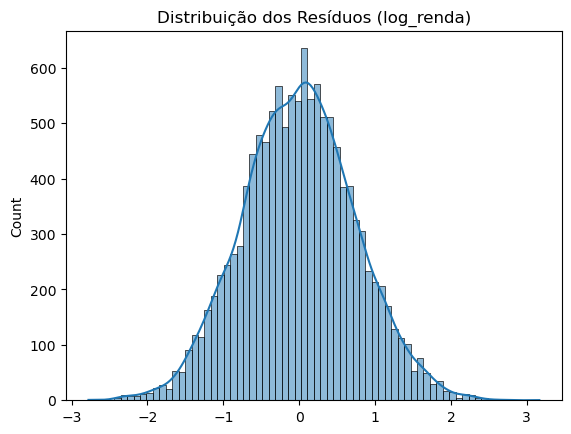

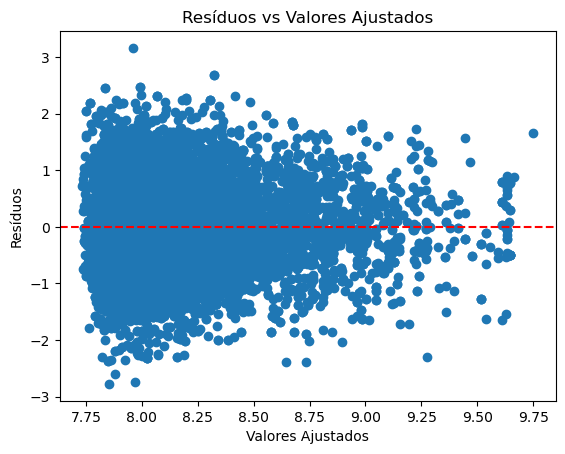

In [91]:
df = pd.read_csv("previsao_de_renda.csv")  

df = df.dropna()

df["log_renda"] = np.log(df["renda"])

variaveis_explicativas = ["tempo_emprego", "idade", "qt_pessoas_residencia"]
X = df[variaveis_explicativas]
y = df["log_renda"]


X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()


print(modelo.summary())

residuos = modelo.resid

sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos (log_renda)")
plt.show()

plt.scatter(modelo.fittedvalues, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

In [94]:
df = pd.read_csv("previsao_de_renda.csv")

df["log_renda"] = np.log(df["renda"])

variaveis = ["tempo_emprego", "idade", "qt_pessoas_residencia"]

X = df[variaveis]
X = sm.add_constant(X)
y = df["log_renda"]

X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     711.9
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:37:18   Log-Likelihood:                -13943.
No. Observations:               12466   AIC:                         2.789e+04
Df Residuals:                   12462   BIC:                         2.792e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.60

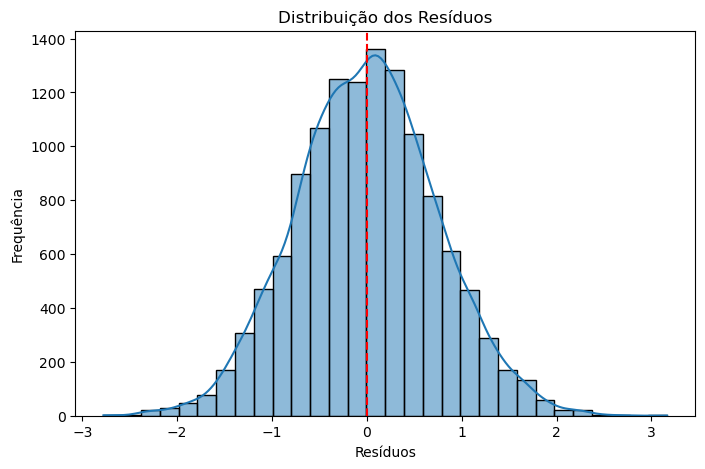

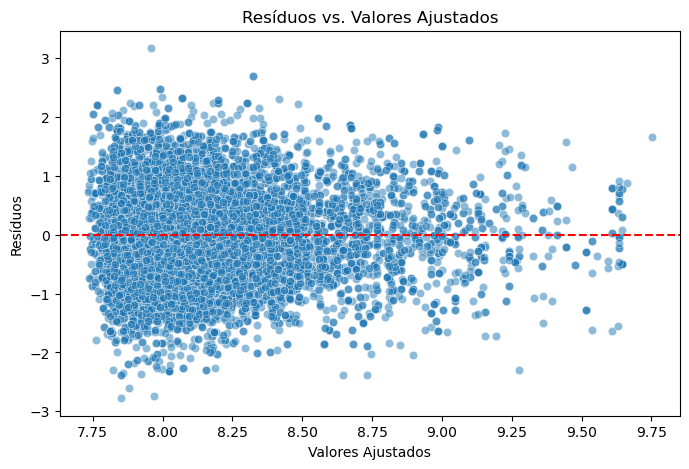

Jarque-Bera Teste: Estatística=3.229, p-valor=0.199
Shapiro-Wilk Teste: Estatística=0.998, p-valor=0.828


In [99]:
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

plt.figure(figsize=(8, 5))
sns.histplot(residuos, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='dashed')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

jb_test = stats.jarque_bera(residuos)
print(f"Jarque-Bera Teste: Estatística={jb_test.statistic:.3f}, p-valor={jb_test.pvalue:.3f}")

shapiro_test = stats.shapiro(residuos.sample(500))  
print(f"Shapiro-Wilk Teste: Estatística={shapiro_test.statistic:.3f}, p-valor={shapiro_test.pvalue:.3f}")


O histograma dos resíduos mostra uma distribuição aproximadamente normal, o que é um bom sinal.
Há uma leve assimetria à direita, mas nada que indique um problema grave.
Isso sugere que o erro do modelo é relativamente bem distribuído.